## **1 Predicting House Prices Using Machine Learning**

This project demonstrates Regression of House Prices using various features such as **Posted On, BHK, Rent, Size, Floor, Area Type,Area Locality, City, Furnishing Status, Tenant Preferred,Bathroom, Point of Contact**

In [74]:
#importing the necessary libaries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### **1.1 Dataset Overview**

Let's load the data and check its basic structure

In [75]:
#reading the data and storing it in a variable
house_data = pd.read_csv("../data/House_Rent_Dataset.csv")

In [76]:
#reading the first 5 rows of the datset
house_data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [77]:
# Quick summary of columns, data types, non-null counts, and memory usage
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [78]:
#shape(rows and columns) of the dataset
house_data.shape

(4746, 12)

In [79]:
# Shows summary statistics (count, mean, std, min, quartiles, max) for numeric column
house_data.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [80]:
#returns the columns in the datset
house_data.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

### **1.2 Data Cleaning and Exploratory Data Analysis**

• Checking for duplicates

• Checking for missing values

• Checking for Outliers

• Explore the dataset with some visualizations

In [81]:
#IQR method for finding outliers
Q1 = house_data["Rent"].quantile(0.25)   # 25%
Q3 = house_data["Rent"].quantile(0.75)   # 75%
IQR = Q3 - Q1

# Define lower & upper limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Find outliers
outliers_iqr = house_data[(house_data["Rent"] < lower_limit) | (house_data["Rent"] > upper_limit)]

print("Number of outliers (Rent, IQR):", len(outliers_iqr))
print(outliers_iqr[["BHK", "Rent", "Size", "Bathroom"]].head())

Number of outliers (Rent, IQR): 520
     BHK    Rent  Size  Bathroom
104    2  180000   950         2
525    2   70000   750         2
527    3   75000  1100         3
530    2  160000   800         2
531    4  300000  1600         5


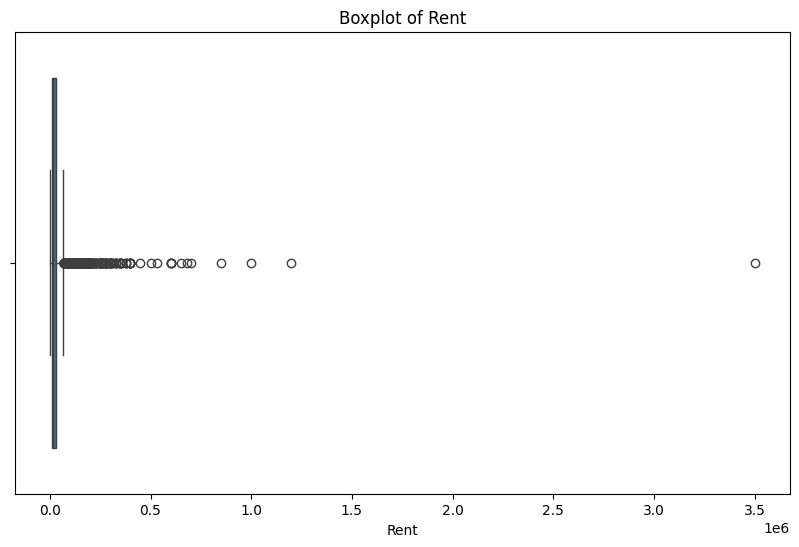

In [82]:
#boxplot for rent to see the distribution of data
plt.figure(figsize=(10,6))
sns.boxplot(x=house_data["Rent"])
plt.title("Boxplot of Rent")
plt.show()

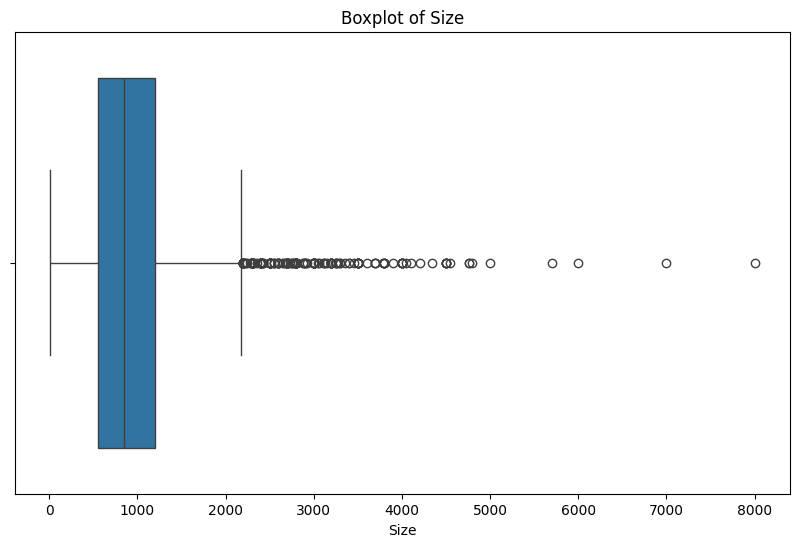

In [83]:
#boxplot for Size to see the distribution of data
plt.figure(figsize=(10,6))
sns.boxplot(x=house_data["Size"])
plt.title("Boxplot of Size")
plt.show()


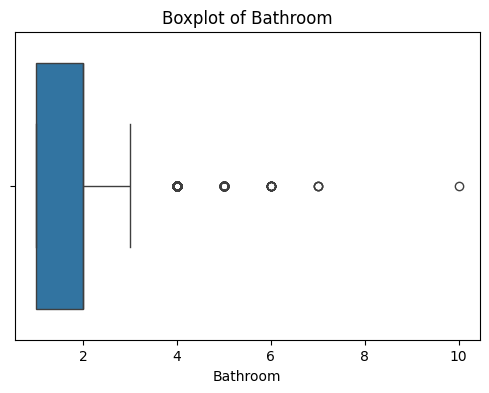

In [84]:
#boxplot for Bathroom to see the distribution of data
plt.figure(figsize=(6,4))
sns.boxplot(x=house_data["Bathroom"])
plt.title("Boxplot of Bathroom")
plt.show()


In [85]:
# Keep only rents within the IQR limits
house_data_clean = house_data[(house_data["Rent"] >= lower_limit) & (house_data["Rent"] <= upper_limit)]
house_data_clean = house_data_clean[(house_data["Size"] >= 100) & (house_data_clean["Bathroom"] <= 5)]



print("Before cleaning:", house_data.shape[0])
print("After cleaning:", house_data_clean.shape[0])

house_data_clean.describe()


Before cleaning: 4746
After cleaning: 4130


,BHK,Rent,Size,Bathroom
count,4130.000000,4130.000000,4130.000000,4130.000000
mean,1.961501,19404.170218,887.432930,1.808232
std,0.739646,13871.078152,471.534492,0.694601
min,1.000000,1200.000000,100.000000,1.000000
25%,1.000000,9500.000000,550.000000,1.000000
50%,2.000000,15000.000000,800.000000,2.000000
75%,2.000000,25000.000000,1118.750000,2.000000
max,6.000000,67000.000000,4200.000000,5.000000


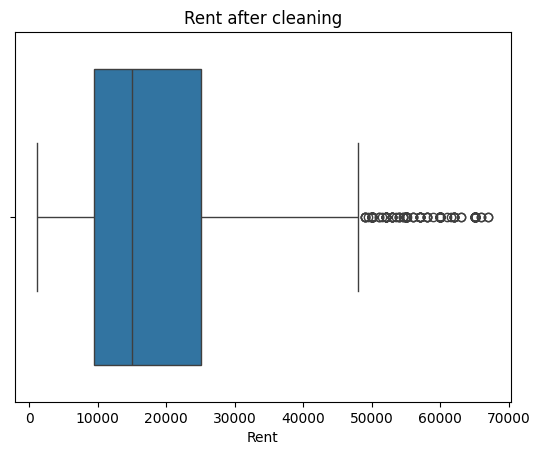

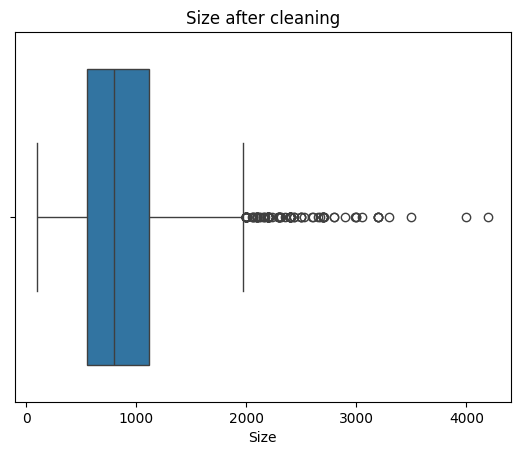

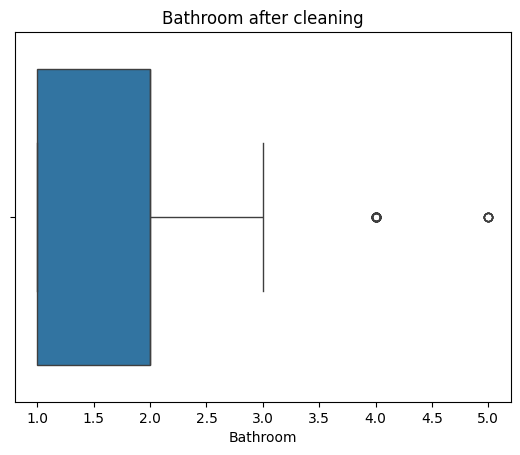

In [86]:
# Rent
sns.boxplot(x=house_data_clean["Rent"])
plt.title("Rent after cleaning")
plt.show()

# Size
sns.boxplot(x=house_data_clean["Size"])
plt.title("Size after cleaning")
plt.show()

# Bathroom
sns.boxplot(x=house_data_clean["Bathroom"])
plt.title("Bathroom after cleaning")
plt.show()




In [87]:
#checking the sum of null vales in each column
house_data_clean.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [88]:
#checking the info of the cleaned data
house_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4130 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4130 non-null   object
 1   BHK                4130 non-null   int64 
 2   Rent               4130 non-null   int64 
 3   Size               4130 non-null   int64 
 4   Floor              4130 non-null   object
 5   Area Type          4130 non-null   object
 6   Area Locality      4130 non-null   object
 7   City               4130 non-null   object
 8   Furnishing Status  4130 non-null   object
 9   Tenant Preferred   4130 non-null   object
 10  Bathroom           4130 non-null   int64 
 11  Point of Contact   4130 non-null   object
dtypes: int64(4), object(8)
memory usage: 419.5+ KB


In [89]:
#checking for duplicates
house_data_clean.duplicated().sum()

np.int64(0)

In [90]:
#checking the datatypes of each column
house_data_clean.dtypes

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object

In [91]:
#dropping useless columns
house_data_clean.drop(columns=['Posted On','Point of Contact'],inplace=True)

In [92]:
#checking the columns after dropping 2 columns
house_data_clean.columns

Index(['BHK', 'Rent', 'Size', 'Floor', 'Area Type', 'Area Locality', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Bathroom'],
      dtype='object')

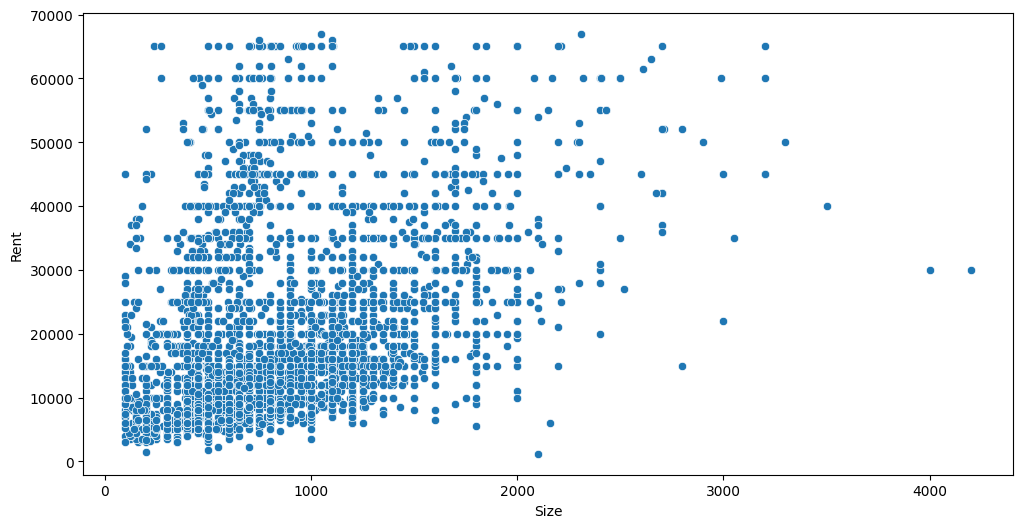

In [93]:
#scatter plot to see the relationship between size and rent
plt.figure(figsize=(12,6))
sns.scatterplot(data=house_data_clean,x='Size',y='Rent')
plt.show()

### **1.3 Feature Engineering**

Convert categorical columns into numerical representations for modeling

In [94]:
#one hot encoding for categorical columns
house_data_clean=pd.get_dummies(house_data_clean,columns=['Furnishing Status','Area Type','City','Tenant Preferred'],drop_first=True)
house_data_clean.head(2)

,BHK,Rent,Size,Floor,Area Locality,Bathroom,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Area Type_Carpet Area,Area Type_Super Area,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family
0,2,10000,1100,Ground out of 2,Bandel,2,False,True,False,True,False,False,False,True,False,True,False
1,2,20000,800,1 out of 3,"Phool Bagan, Kankurgachi",1,True,False,False,True,False,False,False,True,False,True,False


In [95]:
def clean_floor(value):
    try:
        value = str(value).strip()

        
        if value.startswith("Upper Basement"):
            current = -1
            total = int(value.split("out of")[1].strip())

       
        elif value.startswith("Lower Basement"):
            current = -2
            total = int(value.split("out of")[1].strip())

        
        elif value.startswith("Ground out of"):
            current = 0
            total = int(value.split("out of")[1].strip())

        
        elif value == "Ground":
            current = 0
            total = None   

        
        elif value.isdigit():
            current = int(value)
            total = None   

        
        else:
            parts = value.split("out of")
            current = int(parts[0].strip())
            total = int(parts[1].strip())

        return pd.Series([current, total])

    except:
        return pd.Series([None, None])
    


    
house_data_clean[['Current Floor','Total Floors']]=house_data_clean['Floor'].apply(clean_floor)
house_data_clean = house_data_clean.dropna(subset=['Current Floor', 'Total Floors'])
house_data_clean=house_data_clean.drop(columns=['Floor'])
house_data_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4126 entries, 0 to 4745
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   BHK                                4126 non-null   int64  
 1   Rent                               4126 non-null   int64  
 2   Size                               4126 non-null   int64  
 3   Area Locality                      4126 non-null   object 
 4   Bathroom                           4126 non-null   int64  
 5   Furnishing Status_Semi-Furnished   4126 non-null   bool   
 6   Furnishing Status_Unfurnished      4126 non-null   bool   
 7   Area Type_Carpet Area              4126 non-null   bool   
 8   Area Type_Super Area               4126 non-null   bool   
 9   City_Chennai                       4126 non-null   bool   
 10  City_Delhi                         4126 non-null   bool   
 11  City_Hyderabad                     4126 non-null   bool   
 1

### **1.4 Train-Test Split**
Divide the data into training and testing sets

In [96]:
#splitting the dataset into train and test
X=house_data_clean.drop(columns=['Rent'],axis=1)
y=house_data_clean['Rent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=81)

In [97]:
#target encoding for area locality
arealoc_map=X_train.join(y_train).groupby(['Area Locality'])['Rent'].mean().to_dict()

X_train['Area Locality']=X_train['Area Locality'].map(arealoc_map)

X_test['Area Locality']=X_test['Area Locality'].map(arealoc_map)

X_test['Area Locality']=X_test['Area Locality'].fillna(y_train.mean())


### **1.5 Model Training**

In [98]:
#importing Linear Regression for prediction
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

### **1.6 Model Evaluation**

In [99]:
#importing performance metrics to evaluate model
r2=r2_score(y_test,y_pred)
print(f"The R2 score of the model is: {r2:.2f}")

The R2 score of the model is: 0.60


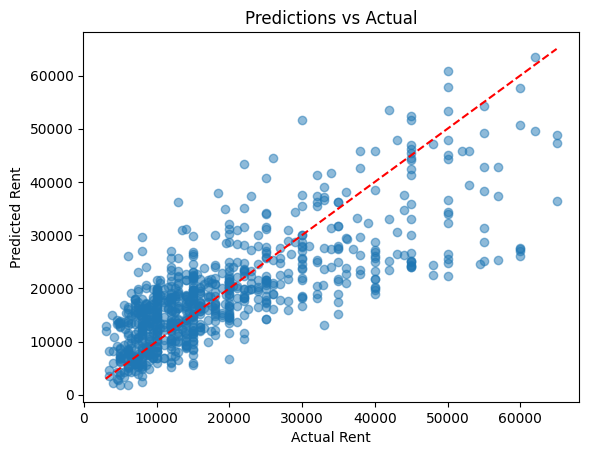

In [100]:
#plotting 
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.title('Predictions vs Actual')
plt.show()

In [101]:
# See which points are the worst predictions
errors = abs(y_test - y_pred)
worst_predictions = errors.nlargest(5)
print(worst_predictions)

1817    33861.761640
3502    33005.141043
4123    32631.434186
4712    32354.479799
574     31717.259216
Name: Rent, dtype: float64


In [102]:
# Calculate errors and find the worst ones
errors = abs(y_test - y_pred)
worst_indices = errors.nlargest(5).index

print("Actual rents for worst predictions:")
print(y_test.loc[worst_indices])




Actual rents for worst predictions:
1817    60000
3502    60000
4123    60000
4712    60000
574     57000
Name: Rent, dtype: int64


In [103]:
#statistics
print("Test set rent statistics:")
print(y_test.describe())

print("\nPrediction statistics:")
print(pd.Series(y_pred).describe())

print("\nError statistics:")
errors = abs(y_test - y_pred)
print(errors.describe())

Test set rent statistics:
count      826.000000
mean     18799.221550
std      12999.212247
min       3000.000000
25%       9500.000000
50%      15000.000000
75%      24000.000000
max      65000.000000
Name: Rent, dtype: float64

Prediction statistics:
count      826.000000
mean     18802.204220
std       9915.090981
min       1843.342361
25%      12330.399190
50%      17288.062609
75%      22627.011929
max      63448.988006
dtype: float64

Error statistics:
count      826.000000
mean      5973.354409
std       5658.231429
min          8.257919
25%       1939.416425
50%       4381.996583
75%       8051.666614
max      33861.761640
Name: Rent, dtype: float64


In [104]:
#saving the results in a dataframe
results = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})

results.to_csv("../scripts/predictions.csv", index=False)



